# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

In [1]:
N = 10
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Screen_Time_Before_Bed'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')
data = np.array(df["Screen_Time_Before_Bed"])
data

array([1.4, 0.9, 0.5, ..., 0.2, 1.6, 0.6], shape=(3000,))

In [4]:
def Mean(data):
    return data.sum() / len(data)

def Variance(data):
    mean = Mean(data)
    deviation = np.sum((data - mean) ** 2)
    return deviation / len(data)

def Mode(data):
    values, counts = np.unique(data, return_counts=True)
    max_count = np.max(counts)
    modes = values[counts == max_count]
    return modes

def Median(data):
    n = len(data)
    sorted_data = sorted(data)
    if n % 2 == 1:
        return sorted_data[n // 2]
    else:
        mid1 = sorted_data[n // 2 - 1]
        mid2 = sorted_data[n // 2]
        return (mid1 + mid2) / 2

def Quantile(data, alpha):
    n = len(data)
    sorted_data = np.sort(data)
    pos = alpha * (n - 1)
    lower_idx = int(np.floor(pos))
    upper_idx = int(np.ceil(pos))
    
    if lower_idx == upper_idx:
        return sorted_data[lower_idx]
    else:
        weight = pos - lower_idx
        return (1 - weight) * sorted_data[lower_idx] + weight * sorted_data[upper_idx]

def Excess_kurtosis(data):
    mean = Mean(data)
    moment = np.sum((data - mean) ** 4) / len(data)
    return moment / (Variance(data) ** 2) - 3

def Skewness(data):
    mean = Mean(data)
    moment = np.sum((data - mean) ** 3) / len(data)
    return moment / (Variance(data) ** 3 ** 0.5)

def IQR(data):
    return Quantile(data, 0.75) - Quantile(data, 0.25)

In [5]:
print("name: calculated | expected")
print("---------------------------------------------")
print(f"Mean: {Mean(data)} | {data.mean()}")
print(f"Variance: {Variance(data)} | {data.var()}")
print(f"Mode: {Mode(data)}")
print(f"Median: {Median(data)} | {np.median(data)}")
print(f"Quantile 0.25: {Quantile(data, 0.25)} | {np.quantile(data, 0.25)}")
print(f"Quantile 0.5: {Quantile(data, 0.5)} | {np.quantile(data, 0.5)}")
print(f"Quantile 0.75: {Quantile(data, 0.75)} | {np.quantile(data, 0.75)}")
print(f"Excess kurtosis: {Excess_kurtosis(data)} | {scipy.stats.kurtosis(data)}")
print(f"Skewness: {Skewness(data)} | {scipy.stats.skew(data)}")
print(f"IQR: {IQR(data)} | {np.quantile(data, 0.75) - np.quantile(data, 0.25)}")

name: calculated | expected
---------------------------------------------
Mean: 1.0067333333333335 | 1.0067333333333335
Variance: 0.24284799555555553 | 0.24284799555555553
Mode: [1.]
Median: 1.0 | 1.0
Quantile 0.25: 0.7 | 0.7
Quantile 0.5: 1.0 | 1.0
Quantile 0.75: 1.4 | 1.4
Excess kurtosis: -0.35033868704647286 | -0.35033868704647286
Skewness: 0.13662726353879232 | 0.09837930491958932
IQR: 0.7 | 0.7


In [6]:
def Histogram(data, k=25):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=k, edgecolor='black')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.title('Гистограмма')
    plt.show()

In [7]:
def Empirical_distribution_function(data):
    n = len(data)
    sorted_data = np.sort(data)
    dots = np.unique(sorted_data)
    dots = np.append(dots, data.max() + 0.1)
    
    count = np.zeros(len(dots))
    for i in range(len(dots)):
        count[i] = np.sum(data < dots[i])
    count = [el / n for el in count]

    plt.figure(figsize=(10, 6))
    plt.step(dots, count, where='post')
    plt.title('Эмпирическая функция распределения')
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.grid(True)
    plt.show()

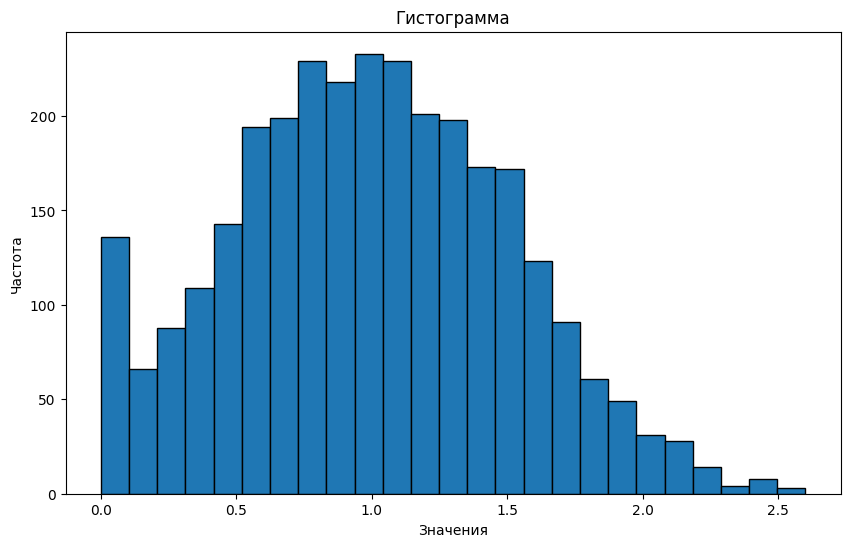

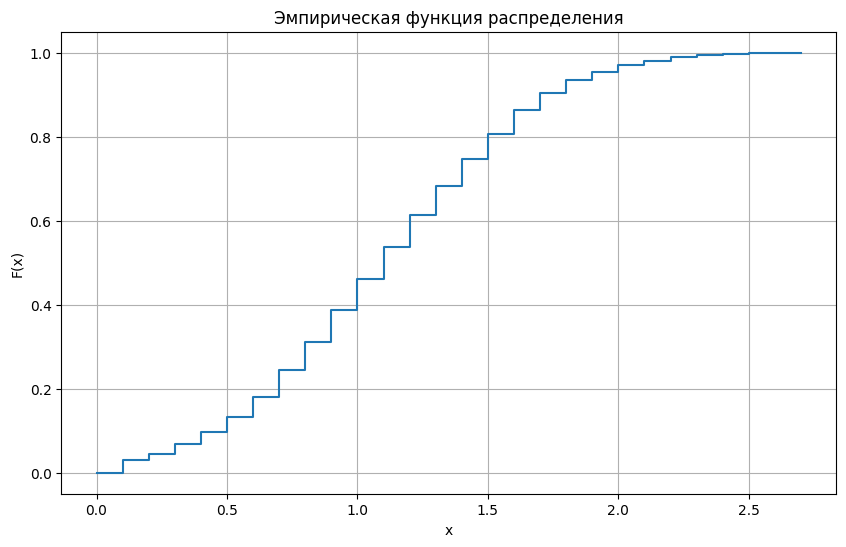

In [8]:
Histogram(data)
Empirical_distribution_function(data)

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

In [9]:
def Chi_squared_test(data, alpha=0.05):
    n = len(data)
    k = 1 + int(np.log2(n))
    segments = np.linspace(data.min(), data.max(), k + 1)
    counts, bins = np.histogram(data, segments)
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)

    expected = []
    for i in range(len(bins) - 1):
        left = bins[i]
        right = bins[i + 1]
        p = scipy.stats.norm.cdf(right, mu, sigma) - scipy.stats.norm.cdf(left, mu, sigma)
        expected.append(n * p)
    expected = np.array(expected)

    print("Наблюдаемые:", counts)
    print("Ожидаемые:", expected.round(2))
    
    chi = np.sum((counts - expected)**2 / (expected + 1e-10))
    df = k - 1 - 2
    p_value = 1 - scipy.stats.chi2.cdf(chi, df)
    
    print(f"Статистика хи-квадрат: {chi:.4f}")
    print(f"Степени свободы: {df}")
    print(f"p-значение: {p_value:.4f}")

    # True - не отклоняем гипотезу нормальности
    # False - отклоняем гипотезу нормальности
    return p_value >= alpha

In [10]:
Chi_squared_test(data)

Наблюдаемые: [202 197 337 428 451 430 543 214 110  59  18  11]
Ожидаемые: [101.77 203.61 336.79 460.6  520.85 486.99 376.48 240.64 127.17  55.57
  20.07   5.99]
Статистика хи-квадрат: 200.8067
Степени свободы: 9
p-значение: 0.0000


np.False_

In [11]:
def Skewness_kurtosis(data, alpha=0.05):
    skewness = Skewness(data)
    kurtosis = Excess_kurtosis(data)

    n = len(data)
    se_skew = np.sqrt(6 / n)
    se_kurt = np.sqrt(24 / n)

    z_skew = skewness / se_skew
    z_kurt = kurtosis / se_kurt
    z_crit = scipy.stats.norm.ppf(1 - alpha / 2)

    print(f"\nКритическое z: {z_crit:.3f}")

    if abs(z_skew) > z_crit:
        print("Асимметрия значимо отличается от 0")
    else:
        print("Асимметрия не отличается от 0")
    
    if abs(z_kurt) > z_crit:
        print("Эксцесс значимо отличается от 0")
    else:
        print("Эксцесс не отличается от 0")

In [12]:
Skewness_kurtosis(data)


Критическое z: 1.960
Асимметрия значимо отличается от 0
Эксцесс значимо отличается от 0


In [13]:
def Q_Q_plot(data):
    scipy.stats.probplot(data, dist="norm", plot=plt)
    plt.title("Q-Q график")
    plt.grid(True, alpha=0.3)
    plt.show()

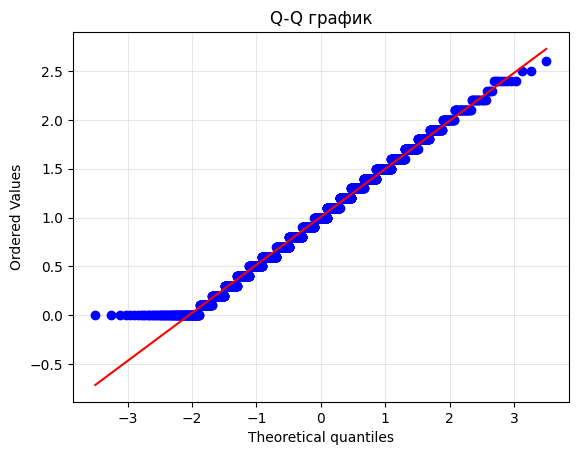

In [14]:
Q_Q_plot(data)

### Выводы
- **Распределение симметричное (mean = 1.0067, median = 1.0, mode = 1.0)**
- **Skewness > 0 -> слабая положительная симметрия**
- **Excess kurtosis = -0.3503 -> плосковерхое распределение**
- **Данные не сильно разбросаны**
- **Правый хвост более тяжёлый**
- **По обоим критериям данные не являются нормальными**
- **Проблемы около нуля по Q-Q графику**

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

In [15]:
np.unique(np.sort(data))

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6])

**Выбросов нет**

In [16]:
np.quantile(data, 0.9985)

np.float64(2.4)

In [17]:
sigma = 1.4 / 3.0

(array([136.,  66.,  88., 109., 143., 194., 199., 229., 218., 233., 229.,
        201., 198., 173., 172., 123.,  91.,  61.,  49.,  31.,  28.,  14.,
          4.,   8.,   3.]),
 array([0.   , 0.104, 0.208, 0.312, 0.416, 0.52 , 0.624, 0.728, 0.832,
        0.936, 1.04 , 1.144, 1.248, 1.352, 1.456, 1.56 , 1.664, 1.768,
        1.872, 1.976, 2.08 , 2.184, 2.288, 2.392, 2.496, 2.6  ]),
 <BarContainer object of 25 artists>)

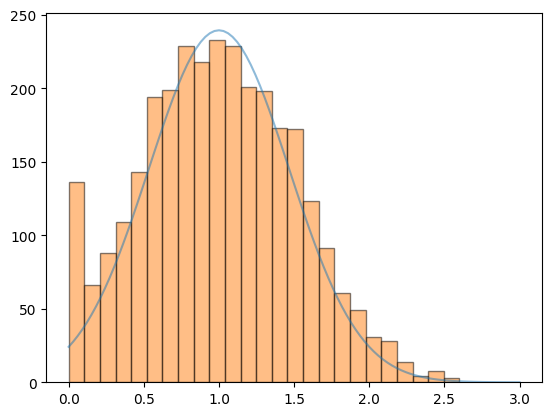

In [18]:
x = np.linspace(0, 3, 100)
y = np.exp(-((x - 1) ** 2) / (2 * sigma ** 2)) / np.sqrt(2 * np.pi * sigma ** 2) * 280
plt.plot(x, y, alpha=0.5)
plt.hist(data, bins=25, edgecolor='black', alpha=0.5)

### Вывод
**Данные близки к нормальному распределению, но не идеально нормальные. Проблема около 0 - те значения, которые по логике должны уходить в минус, группируются около 0.**

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

name: mean, variance
---------------------------------------------------
Grade 10th: 1.0209445585215606, 0.24046481622809052
Grade 11th: 1.0225469728601253, 0.23301981773091993
Grade 12th: 0.9824196597353498, 0.24330151764752125
Grade 7th: 1.0066398390342053, 0.2541812646502759
Grade 8th: 1.0051867219917012, 0.2408652140975534
Grade 9th: 1.0051330798479088, 0.24364285301218755


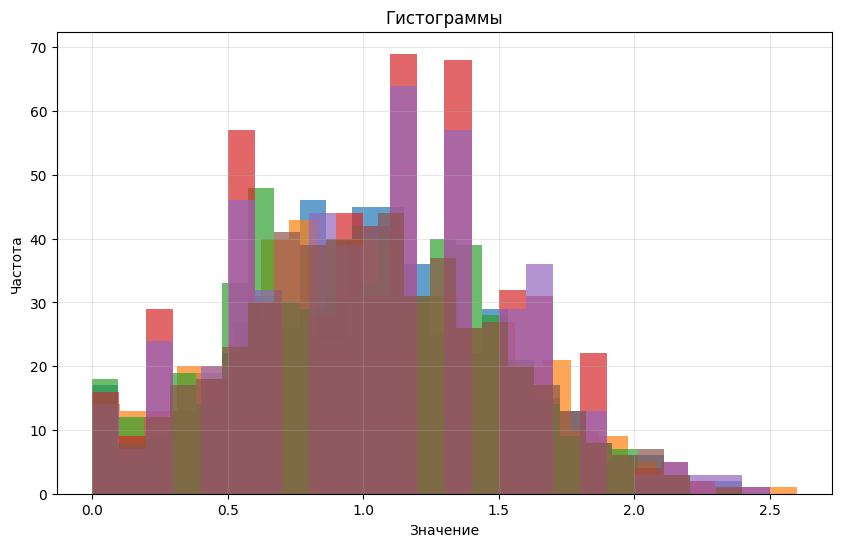

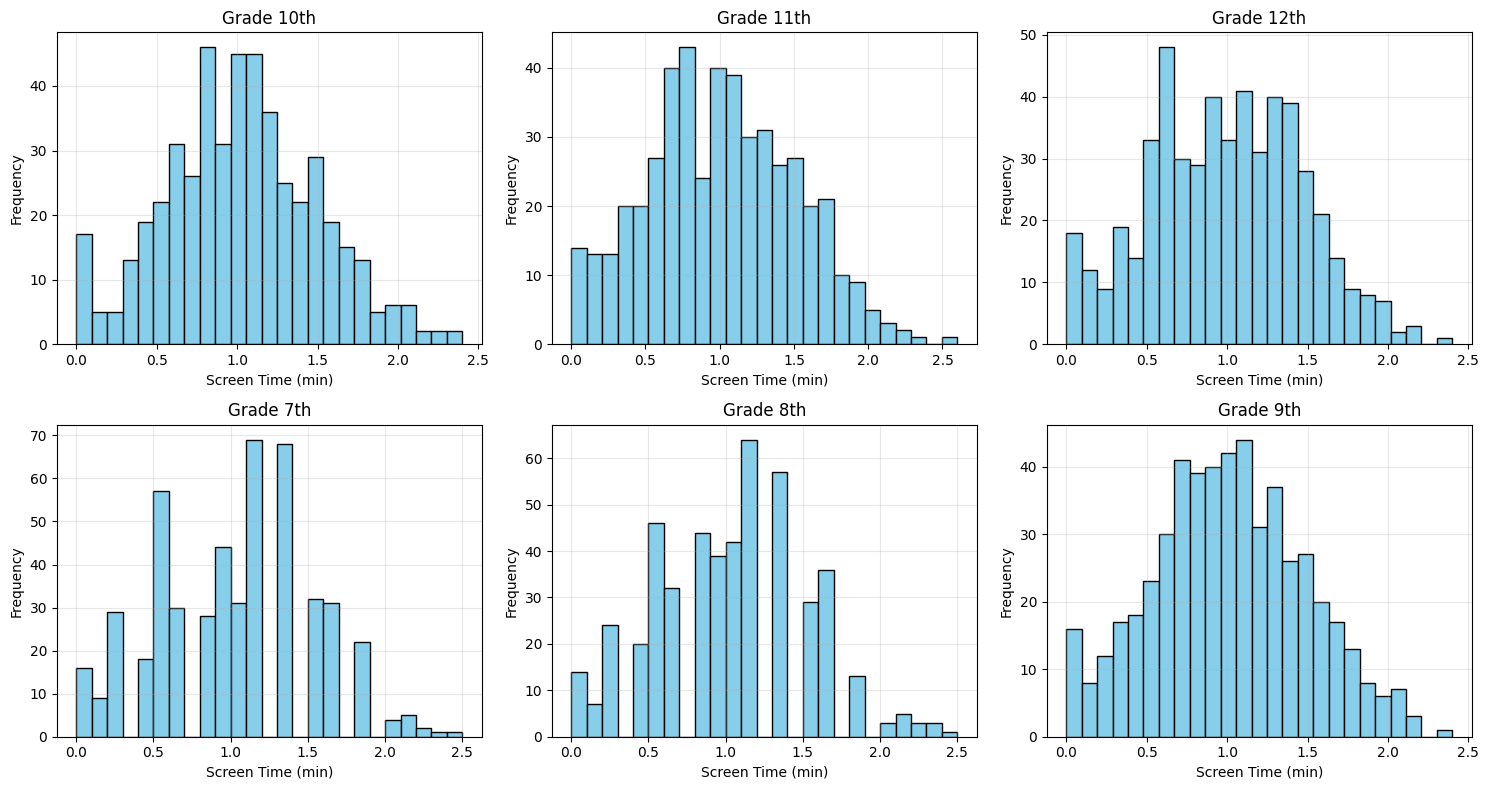

In [19]:
groups = df.groupby('School_Grade')['Screen_Time_Before_Bed']

plt.figure(figsize=(10, 6))
print("name: mean, variance")
print("---------------------------------------------------")
for grade, group_data in groups:
    plt.hist(group_data, bins=25, alpha=0.7)
    print(f"Grade {grade}: {Mean(group_data)}, {Variance(group_data)}")
plt.title('Гистограммы')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 8)) 
axes = axes.flatten()
for i, (grade, data) in enumerate(groups):
    axes[i].hist(data, bins=25, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Grade {grade}')
    axes[i].set_xlabel('Screen Time (min)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными - **не идеально нормальные**
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду) - **изначальные данные имеют почти нормальный вид**
4. Различия распределений внутри разных групп 'School_Grade':
   - **Есть выбросы**
   - **Разное расположение центров (1, 3 и 6 графики)**
   - **Есть небольшие различия в среднем и дисперсии**
   - **У всех тяжёлый правый хвост (все распределения имеют правостороннюю асимметрию)**